# pickle
* pickleを用いると、Pythonのオブジェクトを保存することができる。
* これを用いて学習済みのモデルを保存しておくことができる。これを呼び出せば、予測に用いることができる。
* Jupyter Notebook上で作業するぶんには必要となることは少ない（？）かもしれないが、再現性を担保するためや、個人的にはモデルの学習と、そのモデルを用いて予測するのをパラレルに実行したいため、これが必要となった。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import pickle
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

X = np.array([1,3,2,4,2,5]).reshape(-1,1)
y = np.array([7,8,7,9,7,11])

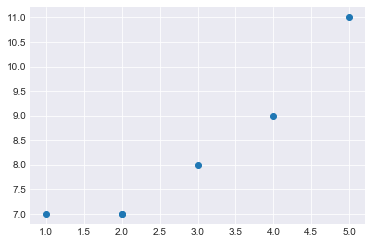

In [2]:
plt.scatter(X,y)

In [3]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

/Users/takizawa/dev/python/play/ml/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
pickle.dump(reg,open("reg.sav", "wb"))

* 上記で "reg.sav" として保存することができた。
* それではこれをloadしてみる。

In [5]:
load_reg = pickle.load(open("reg.sav", "rb"))

In [6]:
load_reg.predict(1)

array([ 6.27692308])

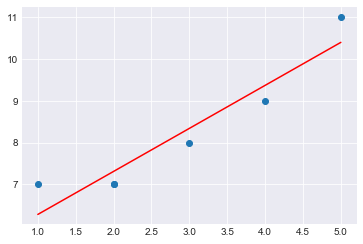

In [7]:
test_X = np.arange(1,6).reshape(-1,1)
pred   = load_reg.predict(test_X)
plt.scatter(X,y)
plt.plot(test_X,pred, c="red")

* 呼び出したもので予測ができている。